In [23]:
import struct
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [24]:
data = open("rtldata.bin", "rb").read()
(serial_no, cfreq, srate, tv_sec, tv_nsec, bufsize) = struct.unpack("@IIIIII", data[:24])
fulltime = tv_sec + (tv_nsec/1e9)

print ("Device serial number was", serial_no)
print ("Timestamp was", fulltime)
print ("Centre frequency was", cfreq)
print ("Sampling rate was", srate)
print ("Buffer size was", bufsize)

bindata = np.array(struct.unpack("B"*int(bufsize), data[24:])).astype(np.uint8)
bindata_complex = bindata[0::2] + bindata[1::2]*1j

Device serial number was 1
Timestamp was 1690438136.5467787
Centre frequency was 97700000
Sampling rate was 2000000
Buffer size was 8388608


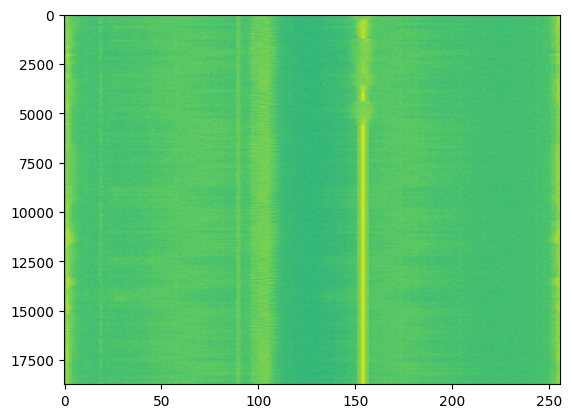

In [25]:
f, t, Sxx = scipy.signal.spectrogram(bindata_complex, return_onesided=False)
plt.figure()
plt.imshow(np.log(Sxx).T, aspect='auto')